In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('coverage.csv')

In [3]:
data.head()

,sistema,region,provincia,municipio,gruposDeServicios,subgrupoDeServicios,cantidadServicios,poblacionUsuaria,valorAutorizado,mes,year
0,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Atencion Ambulatoria,Consulta medica nivel 2,4688,3596,1247074.00,Enero,2018
1,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Atencion Ambulatoria,Consulta medica nivel 3,1190,1081,355258.00,Enero,2018
2,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Servicios Odontologicos,Tratamiento de la Osteomielitis,1,1,164.15,Enero,2018
3,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Emergencia,Emergencia,2066,1745,609990.00,Enero,2018
4,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Hospitalizacion,Hospitalizacion general y especialidades basicas,2387,159,1870881.74,Enero,2018


In [4]:
data.describe()

,cantidadServicios,poblacionUsuaria,valorAutorizado,year
count,33548.000000,33548.000000,3.354800e+04,33548.0
mean,190.030047,58.765858,7.845025e+04,2018.0
std,1466.658007,372.664729,3.767462e+05,0.0
min,0.000000,1.000000,1.000000e+00,2018.0
25%,3.000000,1.000000,2.399000e+03,2018.0
50%,11.000000,4.000000,9.100000e+03,2018.0
75%,51.000000,18.000000,3.611500e+04,2018.0
max,60717.000000,13402.000000,1.447168e+07,2018.0


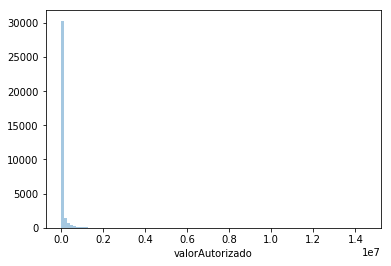

In [5]:
sns.distplot(data['valorAutorizado'], kde=False, bins=100)

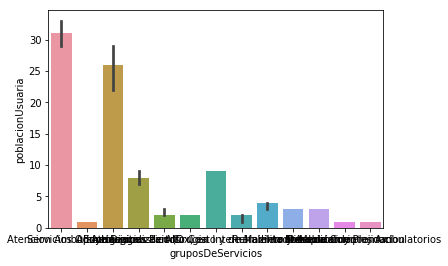

In [6]:
sns.barplot(x='gruposDeServicios', y='poblacionUsuaria', data=data
           , estimator=np.median)

In [7]:
ccorr = data.corr()

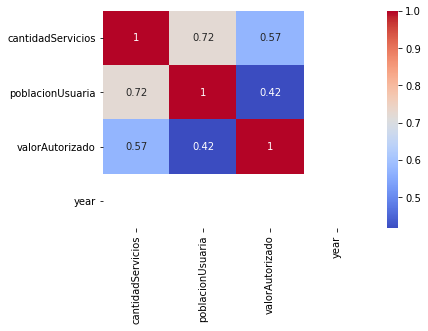

In [8]:
sns.heatmap(ccorr, annot=True, cmap='coolwarm')

/home/alberto/.local/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


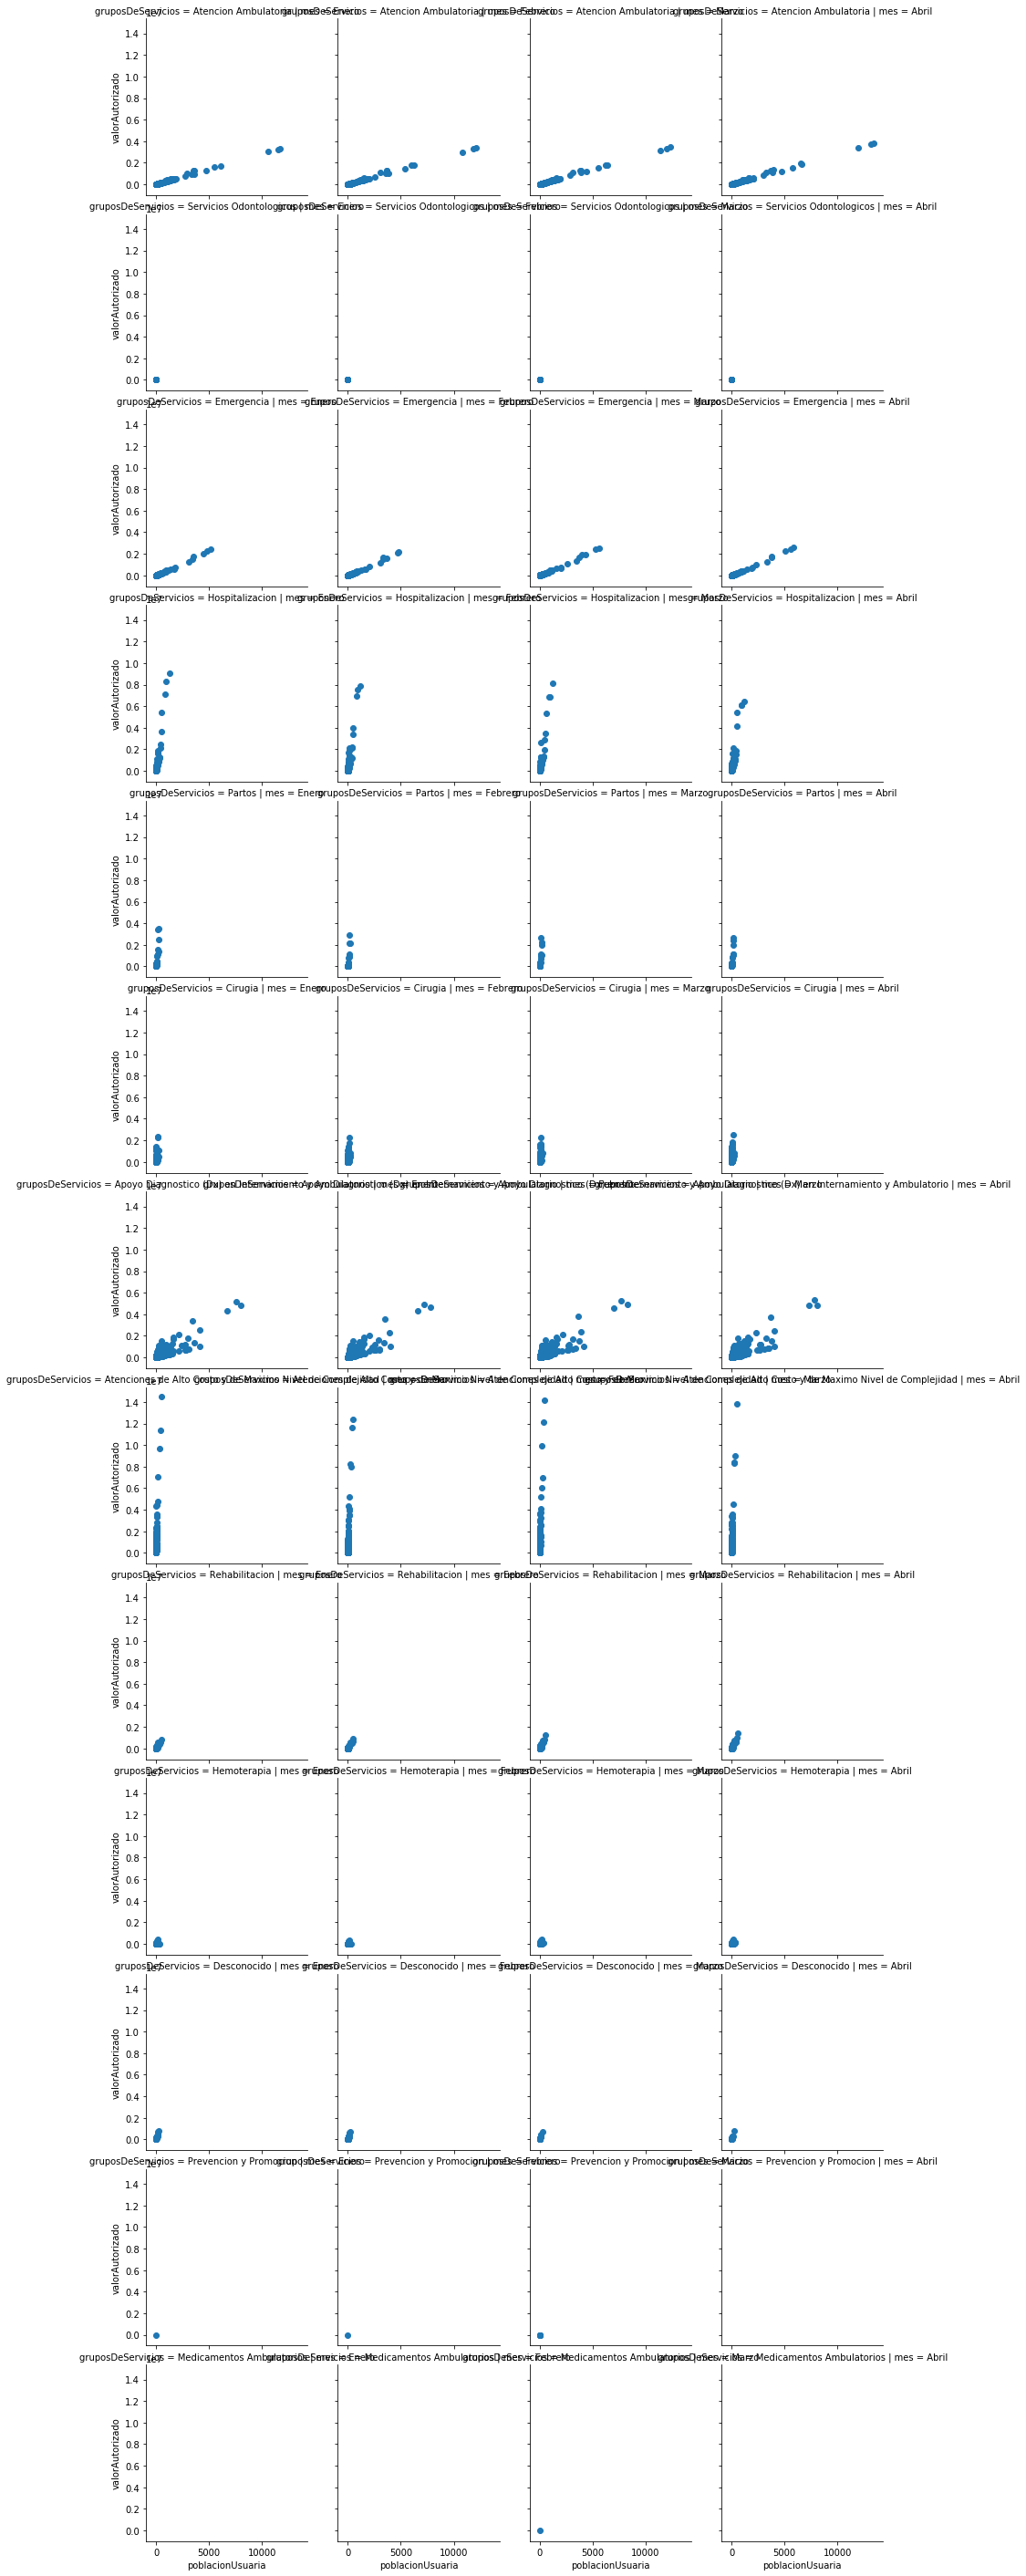

In [9]:
#facet grid
g = sns.FacetGrid(data=data, col='mes', row='gruposDeServicios')
g.map(plt.scatter, 'poblacionUsuaria', 'valorAutorizado')

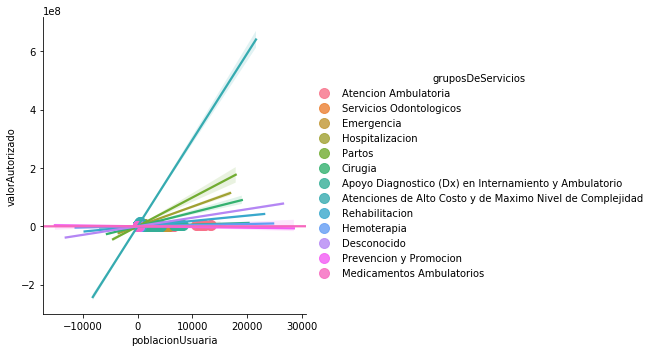

In [10]:
#linear model plot
sns.lmplot(x='poblacionUsuaria', y='valorAutorizado', data= data, hue='gruposDeServicios', 
           scatter_kws={'s': 100})

In [11]:
data['cantidadServicios'].unique()

array([4688, 1190,    1, ...,  641,  631, 3095])

In [12]:
data['poblacionUsuaria'].unique()

array([3596, 1081,    1, ..., 1423,  563, 1293])

In [13]:
data['valorAutorizado'].unique()

array([1.247074e+06, 3.552580e+05, 1.641500e+02, ..., 1.132975e+04,
       1.006055e+04, 1.386420e+05])

In [14]:
data.head()

,sistema,region,provincia,municipio,gruposDeServicios,subgrupoDeServicios,cantidadServicios,poblacionUsuaria,valorAutorizado,mes,year
0,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Atencion Ambulatoria,Consulta medica nivel 2,4688,3596,1247074.00,Enero,2018
1,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Atencion Ambulatoria,Consulta medica nivel 3,1190,1081,355258.00,Enero,2018
2,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Servicios Odontologicos,Tratamiento de la Osteomielitis,1,1,164.15,Enero,2018
3,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Emergencia,Emergencia,2066,1745,609990.00,Enero,2018
4,AUTORIZACIONES,REGION 0,DISTRITO NACIONAL,DISTRITO NACIONAL,Hospitalizacion,Hospitalizacion general y especialidades basicas,2387,159,1870881.74,Enero,2018


In [15]:
data['mes'] = pd.Categorical(data['mes'], ['Enero', 'Febrero', 'Marzo', 'Abril'])

In [16]:
data = data.sort_values('mes')

In [17]:
coverageData = data.groupby(['provincia', 'mes']).sum()[['cantidadServicios', 'poblacionUsuaria', 'valorAutorizado']]

In [18]:
coverageData

cantidadServicios  poblacionUsuaria  \
provincia                  mes                                            
AZUA                       Enero              31396.0            9954.0   
                           Febrero            31973.0            9964.0   
                           Marzo              33844.0           10096.0   
                           Abril              37723.0           10845.0   
BAHORUCO                   Enero              15080.0            4740.0   
                           Febrero            13889.0            4696.0   
                           Marzo              15032.0            4673.0   
                           Abril              15495.0            5391.0   
BARAHONA                   Enero              34576.0           10333.0   
                           Febrero            36736.0           11600.0   
                           Marzo              36729.0           11493.0   
                           Abril              35645.0           11329.0   
DAJABON                    Enero               6371.0            1900.0   
                           Febrero             6728.0            2046.0   
                           Marzo               6871.0            2031.0   
                           Abril               6372.0            2091.0   
DISTRITO NACIONAL          Enero             191774.0           51702.0   
                           Febrero           183098.0           51264.0   
                           Marzo             199929.0           54627.0   
                           Abril             197670.0           56929.0   
DUARTE                     Enero              73790.0           22349.0   
                           Febrero            68543.0           21310.0   
                           Marzo              75130.0           23572.0   
                           Abril              73416.0           23336.0   
EL SEYBO                   Enero              11317.0            4218.0   
                           Febrero            10016.0            4093.0   
                           Marzo              11555.0            4337.0   
                           Abril              11965.0            4397.0   
ELIAS PINA                 Enero                  NaN               NaN   
                           Febrero                NaN               NaN   
...                                               ...               ...   
SAN JOSE DE OCOA           Marzo              18944.0            6505.0   
                           Abril              20264.0            7176.0   
SAN JUAN DE LA MAGUANA     Enero              37551.0           11951.0   
                           Febrero            35729.0           11478.0   
                           Marzo              39899.0           12473.0   
                           Abril              38468.0           12359.0   
SAN PEDRO DE MACORIS       Enero              36414.0           11240.0   
                           Febrero            36722.0           11747.0   
                           Marzo              37930.0           12157.0   
                           Abril              37341.0           12502.0   
SANCHEZ RAMIREZ            Enero              27698.0            8979.0   
                           Febrero            27371.0            8949.0   
                           Marzo              29239.0            9642.0   
                           Abril              30452.0           10104.0   
SANTIAGO DE LOS CABALLEROS Enero              87776.0           28367.0   
                           Febrero            88501.0           29322.0   
                           Marzo              92735.0           30904.0   
                           Abril              92888.0           31661.0   
SANTIAGO RODRIGUEZ         Enero               6426.0            1764.0   
                           Febrero             5811.0            1821.0   
                           Marzo               5573.0        

In [20]:
coverageMunicipio = data.groupby(['municipio', 'gruposDeServicios', 'subgrupoDeServicios']).sum()[['cantidadServicios', 'poblacionUsuaria', 'valorAutorizado']]

In [20]:
data['provincia'].unique()

array(['DISTRITO NACIONAL', 'DUARTE', 'HERMANA MIRABAL',
       'MARIA TRINIDAD SANCHEZ', 'SANTIAGO DE LOS CABALLEROS', 'BARAHONA',
       'BAHORUCO', 'SAMANA', 'SAN CRISTOBAL', 'SAN JOSE DE OCOA',
       'ESPAILLAT', 'PERAVIA', 'PUERTO PLATA', 'MONTECRISTI', 'DAJABON',
       'VALVERDE', 'SANTIAGO RODRIGUEZ', 'SAN JUAN DE LA MAGUANA',
       'ELIAS PInA', 'MONSEnOR NOUEL', 'SANCHEZ RAMIREZ', 'LA VEGA',
       'HATO MAYOR DEL REY', 'EL SEYBO', 'LA ALTAGRACIA', 'LA ROMANA',
       'INDEPENDENCIA', 'PEDERNALES', 'AZUA', 'SAN PEDRO DE MACORIS',
       'SANTO DOMINGO', 'MONTE PLATA', 'MONSENOR NOUEL', 'ELIAS PINA'],
      dtype=object)

In [21]:
test = data.groupby(['provincia', 'mes']).sum()[['cantidadServicios', 'poblacionUsuaria', 'valorAutorizado']]

In [22]:
test[28:36]

cantidadServicios  poblacionUsuaria  valorAutorizado
provincia  mes                                                          
ELIAS PINA Enero                  NaN               NaN              NaN
           Febrero                NaN               NaN              NaN
           Marzo               7055.0            2205.0       3384571.17
           Abril               7091.0            2170.0       3669931.55
ELIAS PInA Enero               6471.0            1899.0       2374598.92
           Febrero             5495.0            1878.0       1982825.26
           Marzo                  NaN               NaN              NaN
           Abril                  NaN               NaN              NaN

In [23]:
test['cantidadServicios'][28] = test['cantidadServicios'][32]
test['poblacionUsuaria'][28] = test['poblacionUsuaria'][32]
test['valorAutorizado'][28] = test['valorAutorizado'][32]

test['cantidadServicios'][29] = test['cantidadServicios'][33]
test['poblacionUsuaria'][29] = test['poblacionUsuaria'][33]
test['valorAutorizado'][29] = test['valorAutorizado'][33]

In [24]:
test = test.drop(index='ELIAS PInA')

In [31]:
test[64:72]

cantidadServicios  poblacionUsuaria  valorAutorizado
provincia      mes                                                          
MONSENOR NOUEL Enero                  NaN               NaN              NaN
               Febrero                NaN               NaN              NaN
               Marzo              24238.0            6812.0      11827726.95
               Abril              22602.0            6750.0       9835196.73
MONSEnOR NOUEL Enero              22580.0            6257.0      11350036.87
               Febrero            21366.0            6084.0       9118683.01
               Marzo                  NaN               NaN              NaN
               Abril                  NaN               NaN              NaN

In [33]:
test['cantidadServicios'][64]

nan

In [34]:
test['cantidadServicios'][68]

22580.0

In [35]:
test['cantidadServicios'][64] = test['cantidadServicios'][68]
test['poblacionUsuaria'][64] = test['poblacionUsuaria'][68]
test['valorAutorizado'][64] = test['valorAutorizado'][68]

test['cantidadServicios'][65] = test['cantidadServicios'][69]
test['poblacionUsuaria'][65] = test['poblacionUsuaria'][69]
test['valorAutorizado'][65] = test['valorAutorizado'][69]

In [36]:
test = test.drop(index='MONSEnOR NOUEL')

In [68]:
#rename indices
test = test.rename(index= {
    "DISTRITO NACIONAL": "Distrito Nacional",
    "AZUA": "Azua",
    "BAHORUCO": "Bahoruco",
    "BARAHONA": "Barahona",
    "DAJABON": "Dajabón",
    "DUARTE": "Duarte",
    "EL SEYBO": "El Seybo",
    "ELIAS PINA": "La Estrelleta",
    "ESPAILLAT": "Espaillat",
    "HATO MAYOR DEL REY": "Hato Mayor",
    "HERMANA MIRABAL": "Hermanas Mirabal",
    "INDEPENDENCIA": "Independencia",
    "LA ALTAGRACIA": "La Altagracia",
    "LA ROMANA": "La Romana",
    "LA VEGA": "La Vega",
    "MARIA TRINIDAD SANCHEZ": "María Trinidad Sánchez",
    "MONSENOR NOUEL": "Monseñor Nouel",
    "MONTECRISTI": "Monte Cristi",
    "MONTE PLATA": "Monte Plata",
    "PERAVIA": "Peravia",
    "PEDERNALES": "Pedernales",
    "PUERTO PLATA": "Puerto Plata",
    "SAMANA": "Samaná",
    "SAN CRISTOBAL": "San Cristóbal",
    "SAN JUAN DE LA MAGUANA": "San Juan",
    "SAN JOSE DE OCOA": "San José de Ocoa",
    "SAN PEDRO DE MACORIS": "San Pedro de Macorís",
    "SANTIAGO DE LOS CABALLEROS": "Santiago",
    "SANTIAGO RODRIGUEZ": "Santiago Rodríguez",
    "SANCHEZ RAMIREZ": "Sánchez Ramírez",
    "VALVERDE": "Valverde",
    "SANTO DOMINGO": "Santo Domingo"
    
})

In [69]:
test.head()

cantidadServicios  poblacionUsuaria  valorAutorizado
provincia mes                                                          
Azua      Enero              31396.0            9954.0     1.174400e+07
          Febrero            31973.0            9964.0     1.398228e+07
          Marzo              33844.0           10096.0     1.374338e+07
          Abril              37723.0           10845.0     1.396395e+07
Bahoruco  Enero              15080.0            4740.0     6.836195e+06

In [70]:
test.groupby(['provincia', 'mes']).sum()[['cantidadServicios', 'poblacionUsuaria', 'valorAutorizado']]

cantidadServicios  poblacionUsuaria  \
provincia            mes                                            
Azua                 Abril              37723.0           10845.0   
                     Enero              31396.0            9954.0   
                     Febrero            31973.0            9964.0   
                     Marzo              33844.0           10096.0   
Bahoruco             Abril              15495.0            5391.0   
                     Enero              15080.0            4740.0   
                     Febrero            13889.0            4696.0   
                     Marzo              15032.0            4673.0   
Barahona             Abril              35645.0           11329.0   
                     Enero              34576.0           10333.0   
                     Febrero            36736.0           11600.0   
                     Marzo              36729.0           11493.0   
Dajabón              Abril               6372.0            2091.0   
                     Enero               6371.0            1900.0   
                     Febrero             6728.0            2046.0   
                     Marzo               6871.0            2031.0   
Distrito Nacional    Abril             197670.0           56929.0   
                     Enero             191774.0           51702.0   
                     Febrero           183098.0           51264.0   
                     Marzo             199929.0           54627.0   
Duarte               Abril              73416.0           23336.0   
                     Enero              73790.0           22349.0   
                     Febrero            68543.0           21310.0   
                     Marzo              75130.0           23572.0   
El Seybo             Abril              11965.0            4397.0   
                     Enero              11317.0            4218.0   
                     Febrero            10016.0            4093.0   
                     Marzo              11555.0            4337.0   
Espaillat            Abril              21914.0            7251.0   
                     Enero              20543.0            5902.0   
...                                         ...               ...   
San José de Ocoa     Febrero            14687.0            5821.0   
                     Marzo              18944.0            6505.0   
San Juan             Abril              38468.0           12359.0   
                     Enero              37551.0           11951.0   
                     Febrero            35729.0           11478.0   
                     Marzo              39899.0           12473.0   
San Pedro de Macorís Abril              37341.0           12502.0   
                     Enero              36414.0           11240.0   
                     Febrero            36722.0           11747.0   
                     Marzo              37930.0           12157.0   
Santiago             Abril              92888.0           31661.0   
                     Enero              87776.0           28367.0   
                     Febrero            88501.0           29322.0   
                     Marzo              92735.0           30904.0   
Santiago Rodríguez   Abril               5352.0            1822.0   
                     Enero               6426.0            1764.0   
                     Febrero             5811.0            1821.0   
                     Marzo               5573.0            1919.0   
Santo Domingo        Abril             536722.0          165211.0   
                     Enero             517455.0          150257.0   
                     Febrero           498167.0          149811.0   
                     Marzo             527308.0          158720.0   
Sánchez Ramírez      Abril              30452.0           10104.0   
                     Enero              27698.0            8979.0   
                     Febrero            27371.0            8949.0   
                     Marzo  

In [71]:
newTest = test.swaplevel(i=0, j=1)

In [72]:
newTest = newTest.swaplevel(i=0, j=1)

In [75]:
newTest = newTest.sort_index(ascending=True)

In [76]:
newTest

cantidadServicios  poblacionUsuaria  \
provincia            mes                                            
Azua                 Abril              37723.0           10845.0   
                     Enero              31396.0            9954.0   
                     Febrero            31973.0            9964.0   
                     Marzo              33844.0           10096.0   
Bahoruco             Abril              15495.0            5391.0   
                     Enero              15080.0            4740.0   
                     Febrero            13889.0            4696.0   
                     Marzo              15032.0            4673.0   
Barahona             Abril              35645.0           11329.0   
                     Enero              34576.0           10333.0   
                     Febrero            36736.0           11600.0   
                     Marzo              36729.0           11493.0   
Dajabón              Abril               6372.0            2091.0   
                     Enero               6371.0            1900.0   
                     Febrero             6728.0            2046.0   
                     Marzo               6871.0            2031.0   
Distrito Nacional    Abril             197670.0           56929.0   
                     Enero             191774.0           51702.0   
                     Febrero           183098.0           51264.0   
                     Marzo             199929.0           54627.0   
Duarte               Abril              73416.0           23336.0   
                     Enero              73790.0           22349.0   
                     Febrero            68543.0           21310.0   
                     Marzo              75130.0           23572.0   
El Seybo             Abril              11965.0            4397.0   
                     Enero              11317.0            4218.0   
                     Febrero            10016.0            4093.0   
                     Marzo              11555.0            4337.0   
Espaillat            Abril              21914.0            7251.0   
                     Enero              20543.0            5902.0   
...                                         ...               ...   
San José de Ocoa     Febrero            14687.0            5821.0   
                     Marzo              18944.0            6505.0   
San Juan             Abril              38468.0           12359.0   
                     Enero              37551.0           11951.0   
                     Febrero            35729.0           11478.0   
                     Marzo              39899.0           12473.0   
San Pedro de Macorís Abril              37341.0           12502.0   
                     Enero              36414.0           11240.0   
                     Febrero            36722.0           11747.0   
                     Marzo              37930.0           12157.0   
Santiago             Abril              92888.0           31661.0   
                     Enero              87776.0           28367.0   
                     Febrero            88501.0           29322.0   
                     Marzo              92735.0           30904.0   
Santiago Rodríguez   Abril               5352.0            1822.0   
                     Enero               6426.0            1764.0   
                     Febrero             5811.0            1821.0   
                     Marzo               5573.0            1919.0   
Santo Domingo        Abril             536722.0          165211.0   
                     Enero             517455.0          150257.0   
                     Febrero           498167.0          149811.0   
                     Marzo             527308.0          158720.0   
Sánchez Ramírez      Abril              30452.0           10104.0   
                     Enero              27698.0            8979.0   
                     Febrero            27371.0            8949.0   
                     Marzo  

In [77]:
newTest.to_csv('cleanCoverage.csv')

In [22]:
coverageMunicipio.to_csv('municipioCoverage.csv')

In [28]:
coverageMunicipio

cantidadServicios  \
municipio               gruposDeServicios                                  subgrupoDeServicios                                                     
AGUA SANTA DEL YUNA(DM) Apoyo Diagnostico (Dx) en Internamiento y Ambul... Biopsias                                                           82   
                                                                           Ecografias                                                        229   
                                                                           Laboratorios                                                     2704   
                                                                           Otros Medios Dx                                                    86   
                                                                           Rayos X                                                           210   
                                                                           Resonancia Nuclear Magnetica (RNM)                                  7   
                                                                           Tomografia Axial Computarizada (TAC)                               32   
                        Atencion Ambulatoria                               Consulta medica nivel 2                                           534   
                                                                           Consulta medica nivel 3                                           181   
                        Atenciones de Alto Costo y de Maximo Nivel de C... Atencion en Unidad de Cuidados Intensivos                          10   
                                                                           Cirugia de Corazon Abierto para By Pass                             1   
                                                                           Hemodialisis Renal                                                123   
                                                                           Tratamiento del Cancer Adultos                                     32   
                        Cirugia                                            Cirugia General                                                    12   
                                                                           Cirugias Dermatologicas                                             8   
                                                                           Cirugias Ginecologicas                                             14   
                                                                           Cirugias Menores                                                    9   
                                                                           Cirugias Oftalmologicas                                            49   
                                                                           Cirugias Ortopedicas                                                1   
                                                                           Cirugias Otorrinolaringologicas                                     1   
                                                                           Neumologia                                                          1   
                        Desconocido                                        Desconocido                                                        16   
                        Emergencia                                         Emergencia                                                        378   
                        Hemoterapia                                        Sangre Total                                                       20   
                        Hospitalizacion                                    Hospitalizacion general y especialidades basicas                  745   
                        Partos                                             Atencion de partos normal                               